<a href="https://colab.research.google.com/github/Parolkaraditi/Machine-Learning-/blob/main/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Neural Network

### Importing libraries

image is not inserted in to NN so we takes pixels in Flatend form.
Optimizer:
RMS prop, SGD, Adam, Adagrad

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np #for matrices
import matplotlib.pyplot as plt #for graphs
import keras #framework
from keras.datasets import mnist #hand written digits
from keras.models import Sequential,model_from_json
from keras.layers import Dense #every  neuron connected to each neuron
from keras.optimizers import RMSprop #for convergence
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code

### Import data

In [ ]:
batch_size = 256 #should be power of 2, hyperparameter
num_classes = 10 #number of neurons in output layer
epochs = 8

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()#xtrain:features,ytrain:Output,
#Xtest:Testing of feature,ytest:testing of output
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784) #10000  pixels
x_train = x_train.astype('float32')#preprocessing of floating image
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255#coloured image range from 0 to 255
x_test /= 255#we will take gray scale of range from 0 to 1

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) #to_categorical:one code handcoding
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


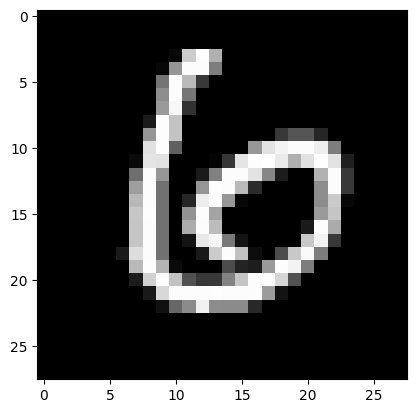

In [ ]:
print("Label:",y_test[11:12])
plt.imshow(x_test[11:12].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
first_layer_size = 16
model = Sequential()
model.add(Dense(first_layer_size, activation='tanh', input_shape=(784,)))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))#for multiclass

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 16)                272       
                                                                 
 dense_6 (Dense)             (None, 2)                 34        
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 12896 (50.38 KB)
Trainable params: 12896 (50.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 16)
Visualization of First Layer


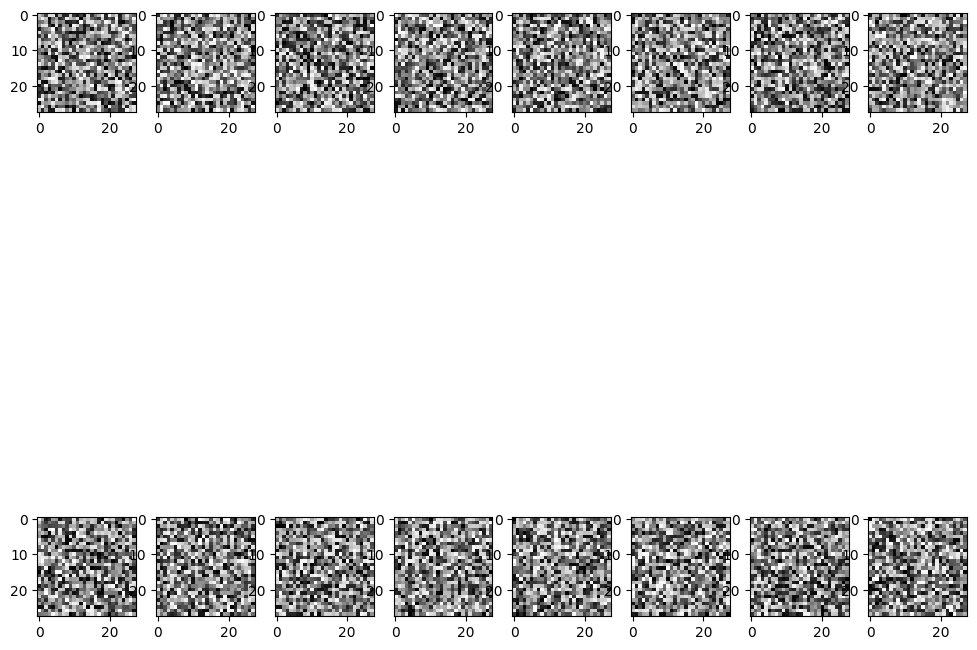

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

from keras.optimizers import RMSprop, SGD, Adam
optimizers = {
    "RMSprop": RMSprop(),
    "SGD": SGD(),
    "Adam": Adam()
}

for optimizer_name, optimizer in optimizers.items():
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
   

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1)

Epoch 1/4
235/235 [==============================] - 1s 5ms/step - loss: 1.2117 - accuracy: 0.4584
Epoch 2/4
235/235 [==============================] - 1s 3ms/step - loss: 1.1639 - accuracy: 0.4778
Epoch 3/4
235/235 [==============================] - 1s 3ms/step - loss: 1.1277 - accuracy: 0.5030
Epoch 4/4
235/235 [==============================] - 1s 3ms/step - loss: 1.0981 - accuracy: 0.5242


### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1050620079040527
Test accuracy: 0.5217000246047974


### Weights after Training

Shape of First Layer (784, 16)
Visualization of First Layer


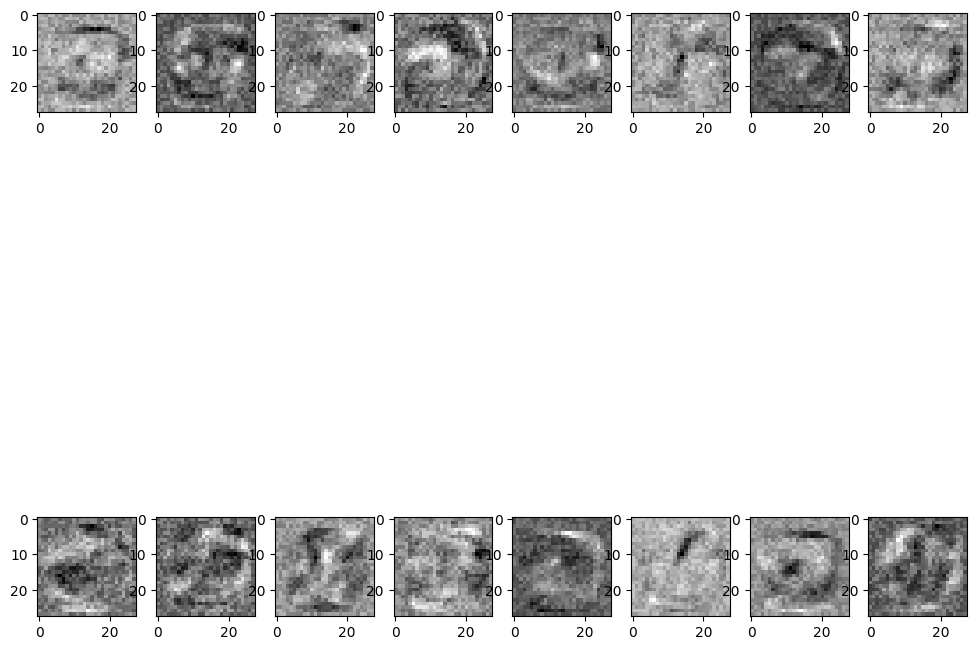

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[75:76])
print(prediction)
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 103ms/step
[[1.38067305e-02 1.26285711e-04 1.66874565e-02 1.35693476e-02
  1.51921194e-02 1.65474298e-03 7.44468207e-03 5.29364288e-01
  2.81233061e-03 3.99341971e-01]]
Prediction
 [1.38067305e-02 1.26285711e-04 1.66874565e-02 1.35693476e-02
 1.51921194e-02 1.65474298e-03 7.44468207e-03 5.29364288e-01
 2.81233061e-03 3.99341971e-01]

Thresholded output
 [0 0 0 0 0 0 0 1 0 0]


### Ground truth

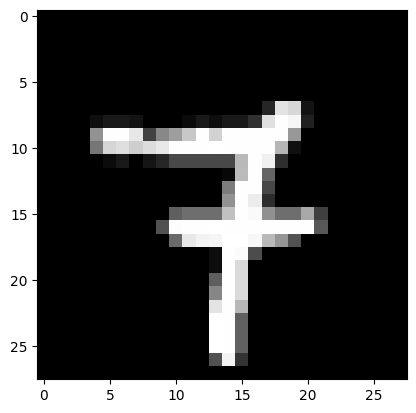

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[75:76].reshape(28,28),cmap='gray')
plt.show()

### User Input

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color (Update the file path according to your directory structure)
image_bgr = cv2.imread('path/to/your/image/digit.jpg', cv2.IMREAD_COLOR)

# Check if the image is successfully loaded
if image_bgr is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Convert to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Show image
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()


Error: Image not loaded. Please check the file path.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Convert to grayscale and resize

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/drive/MyDrive/digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(image_resized)
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

ValueError: ignored

# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 2s - loss: 0.3694 - acc: 0.9018     
Epoch 2/2
60000/60000 [==============================] - 2s - loss: 0.2892 - acc: 0.9208     
Test loss: 0.26339185618162153
Test accuracy: 0.9265


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 2.0296 - acc: 0.4231 - val_loss: 1.7575 - val_acc: 0.5833
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 1.5027 - acc: 0.6944 - val_loss: 1.2493 - val_acc: 0.7344
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 1.0668 - acc: 0.7538 - val_loss

### Relu Activation Function

In [ ]:
# Write your code here

# Use the same model design from the above cell

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                330       
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 15s - loss: 1.8398 - acc: 0.5610 - val_loss: 1.3080 - val_acc: 0.7207
Epoch 2/2
60000/60000 [==============================] - 11s - loss: 0.9784 - acc: 0.7753 - val_loss: 0.7332 - val_acc: 0.8147
Test loss: 0.7331901484489441
Test accuracy: 0.8147
Shape of First Layer (784, 8)
Visualization of F

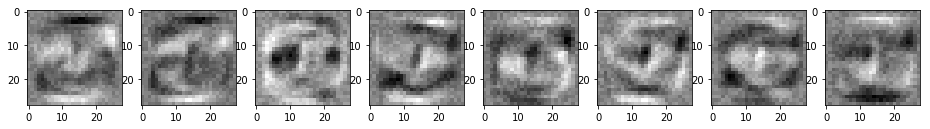

In [ ]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [ ]:
# Write your code here

# Use the same layer design from the above cell

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_30 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 72        
__________

### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here

# Use the same number of units from the above cell


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science